# Demo: fetching positions of S-MODE in-situ assets

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tools.config import MAPEXTENT

In [18]:
# B. Greenwood is pushing hourly the positions of all assets to a table http://smode.whoi.edu/index.php/insitu/
# We can fetch the json file with pandas:
assets = pd.read_json('http://smode.whoi.edu/status.php?format=json')

In [19]:
assets

,type,sn,last_updated,latitude,longitude
0,APL Float,88,2021-09-11 14:41:23,47.744000,-122.389400
1,drifter,0-4421166,2021-04-15 19:34:29,33.204300,-117.306000
2,drifter,0-4421176,2021-04-15 20:56:15,33.204300,-117.306100
3,drifter,300234064739060,2021-07-16 12:00:26,33.585600,-117.230100
4,navo_glider,NG231,2021-10-13 23:07:29,37.510250,-123.927170
5,navo_glider,NG258,2021-10-14 04:31:19,36.704640,-123.420450
6,navo_glider,NG268,2021-10-14 01:59:46,36.856990,-123.307600
7,navo_glider,NG316,2021-10-14 07:40:10,37.167080,-124.159410
8,navo_glider,NG350,2021-09-01 21:19:44,37.226280,-123.558720
9,navo_glider,NG533,2021-10-14 05:57:34,36.632630,-123.333720


### Quick plot: current position of all in-situ assets

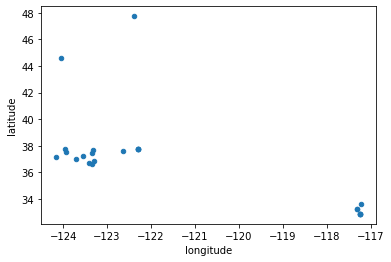

In [20]:
assets.plot.scatter(x='longitude', y='latitude')

### Quick plot 2: current position of a single type of asset

In [21]:
# get ops area polygon and shore line
map_url = 'https://raw.githubusercontent.com/NASA-SMODE/Maps/main/tools/' 
shore = pd.read_json(map_url + 'NorthCalShoreLine.json')
opsarea = pd.read_json(map_url + 'ops_area_polygon.json')

(36.0, 39.0)

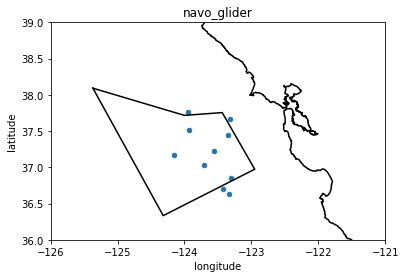

In [22]:
# Plot a single type of asset
asset_type = 'navo_glider'

fig, ax = plt.subplots()

assets[assets.type==asset_type].\
             plot.scatter(x='longitude',
                          y='latitude',
                          ax = ax)

ax.set_title(asset_type)

shore.plot(x = 'longitude',
           y = 'latitude', 
           color = 'k',
           legend=False,
           ax = ax
)

opsarea.plot(x = 'longitude',
             y = 'latitude', 
             color = 'k',
             legend=False,
             ax = ax
)

ax.set_xlim(*MAPEXTENT[:2])
ax.set_ylim(*MAPEXTENT[2:])